In [28]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Configuración de conexión a PostgreSQL
host = "localhost"
port = 5432
dbname = "project_4 AH"
user = "postgres"
password = "postgres"

# Crear la conexión con SQLAlchemy
try:
    engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{dbname}')
    conn = engine.connect()
    print("Conexión exitosa a PostgreSQL con SQLAlchemy")
except Exception as e:
    print("Error al conectar a PostgreSQL:", e)
    exit()

# Consultas
queries = {
    "precio_promedio_vecindario": """
        SELECT p.Neighborhood, AVG(s.SalePrice) AS Avg_SalePrice
        FROM sales s
        JOIN properties p ON s.property_id = p.property_id
        GROUP BY p.Neighborhood
        ORDER BY Avg_SalePrice DESC;
    """,
    "area_total_precio_promedio": """
        SELECT l.Lot_Area, AVG(s.SalePrice) AS Avg_SalePrice
        FROM lots l
        JOIN sales s ON l.property_id = s.property_id
        GROUP BY l.Lot_Area
        ORDER BY Avg_SalePrice DESC;
    """,
    "chimeneas_precio_promedio": """
        SELECT e.Fireplaces, AVG(s.SalePrice) AS Avg_SalePrice
        FROM extra_features e
        JOIN sales s ON e.property_id = s.property_id
        GROUP BY e.Fireplaces
        ORDER BY Avg_SalePrice DESC;
    """
}


Conexión exitosa a PostgreSQL con SQLAlchemy


In [30]:
# Ejecutar las consultas y cargar en pandas
dataframes = {}
for name, query in queries.items():
    try:
        # Ejecutar la consulta y cargar los datos en un DataFrame
        df = pd.read_sql_query(query, conn)

        # Reemplazar valores infinitos por NaN
        df = df.replace([float('inf'), float('-inf')], pd.NA)

        # Eliminar filas con valores nulos
        df = df.dropna()

        # Guardar el DataFrame limpio
        dataframes[name] = df
        print(f"Consulta '{name}' ejecutada y limpiada con éxito")
    except Exception as e:
        print(f"Error al ejecutar la consulta '{name}':", e)

# Cerrar la conexión
conn.close()

# Verificar y limpiar valores infinitos en cada DataFrame antes de la visualización
for name, df in dataframes.items():
    # Reemplazar valores infinitos por NaN
    dataframes[name] = df.replace([float('inf'), float('-inf')], pd.NA)

    # Eliminar valores nulos
    dataframes[name] = dataframes[name].dropna()


Consulta 'precio_promedio_vecindario' ejecutada y limpiada con éxito
Consulta 'area_total_precio_promedio' ejecutada y limpiada con éxito
Consulta 'chimeneas_precio_promedio' ejecutada y limpiada con éxito


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_saleprice', ylabel='Count'>

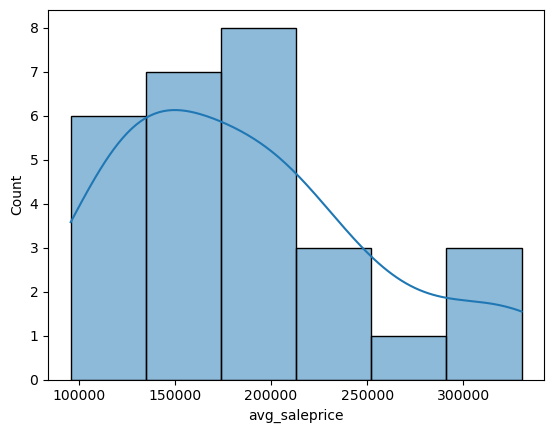

In [42]:
sns.histplot(dataframes["precio_promedio_vecindario"]["avg_saleprice"], kde=True)


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


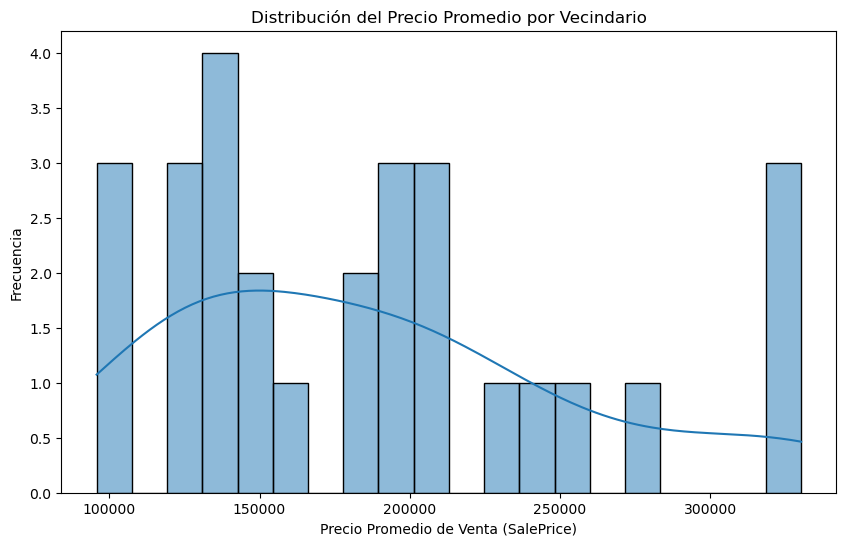

In [46]:
# 1. Histograma del precio de venta (SalePrice)
if "precio_promedio_vecindario" in dataframes:
    saleprice_data = dataframes["precio_promedio_vecindario"]
    plt.figure(figsize=(10, 6))
    sns.histplot(saleprice_data["avg_saleprice"], kde=True, bins=20)
    plt.title("Distribución del Precio Promedio por Vecindario")
    plt.xlabel("Precio Promedio de Venta (SalePrice)")
    plt.ylabel("Frecuencia")
    plt.show()

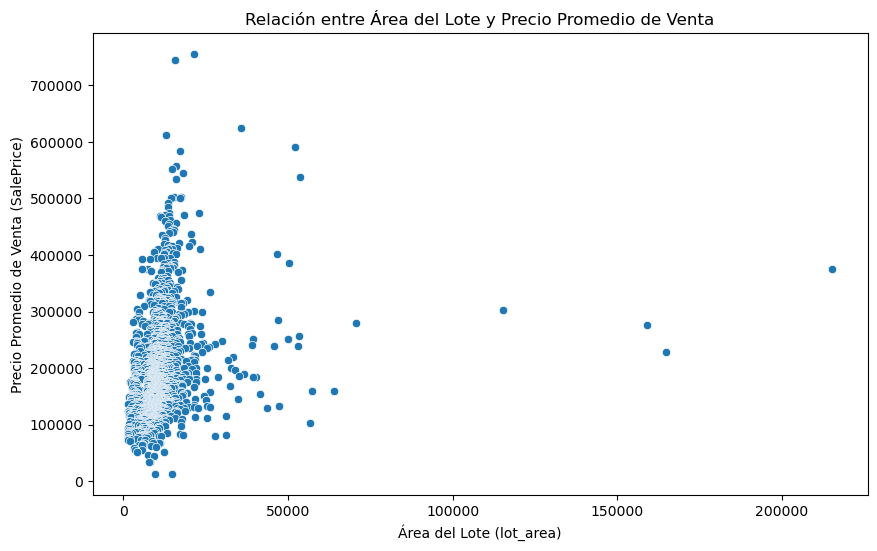

In [54]:
# 2. Gráfico de dispersión: Relación entre Lot_Area y SalePrice
if "area_total_precio_promedio" in dataframes:
    area_data = dataframes["area_total_precio_promedio"]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="lot_area", y="avg_saleprice", data=area_data)
    plt.title("Relación entre Área del Lote y Precio Promedio de Venta")
    plt.xlabel("Área del Lote (lot_area)")
    plt.ylabel("Precio Promedio de Venta (SalePrice)")
    plt.show()

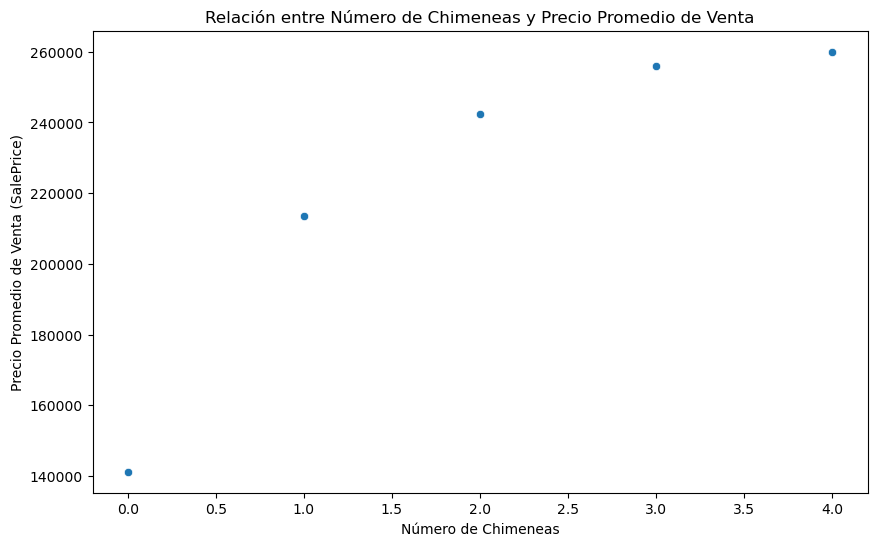

In [58]:
# 3. Gráfico de dispersión: Relación entre chimeneas y SalePrice
if "chimeneas_precio_promedio" in dataframes:
    fireplace_data = dataframes["chimeneas_precio_promedio"]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="fireplaces", y="avg_saleprice", data=fireplace_data)
    plt.title("Relación entre Número de Chimeneas y Precio Promedio de Venta")
    plt.xlabel("Número de Chimeneas")
    plt.ylabel("Precio Promedio de Venta (SalePrice)")
    plt.show()

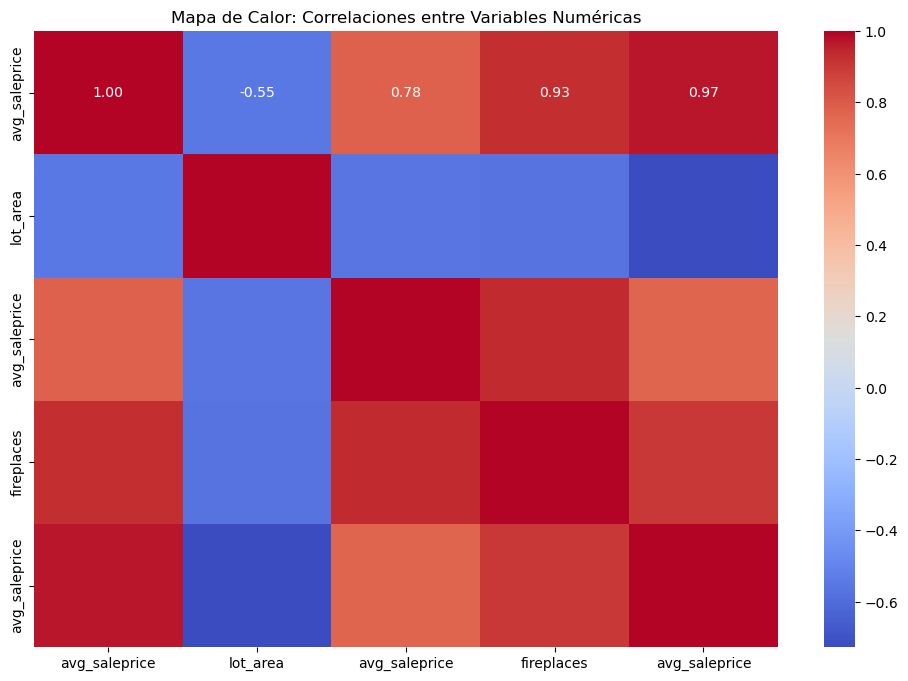

In [62]:
# Generar el mapa de calor solo con columnas numéricas
try:
    # Combinar los DataFrames
    combined_data = pd.concat(dataframes.values(), axis=1, join="inner")
    
    # Seleccionar únicamente las columnas numéricas
    numeric_data = combined_data.select_dtypes(include=["number"])

    # Calcular la matriz de correlación
    correlation_matrix = numeric_data.corr()

    # Crear el mapa de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Calor: Correlaciones entre Variables Numéricas")
    plt.show()
except Exception as e:
    print(f"Error al generar el mapa de calor: {e}")
